In [94]:
include("../minima_analysis.jl")

hist_overlaps (generic function with 1 method)

In [2]:
N1k  = readdlm("../overlaps/N1000.txt", '\t', Float64, '\n')
N5k  = readdlm("../overlaps/N5000.txt", '\t', Float64, '\n')
N10k = readdlm("../overlaps/N10000.txt", '\t', Float64, '\n')
N20k = readdlm("../overlaps/N20000.txt", '\t', Float64, '\n')

1×800 Matrix{Float64}:
 0.0151  -0.0232  -0.0356  -0.0168  …  -0.0471  0.0192  -0.0293  0.0181

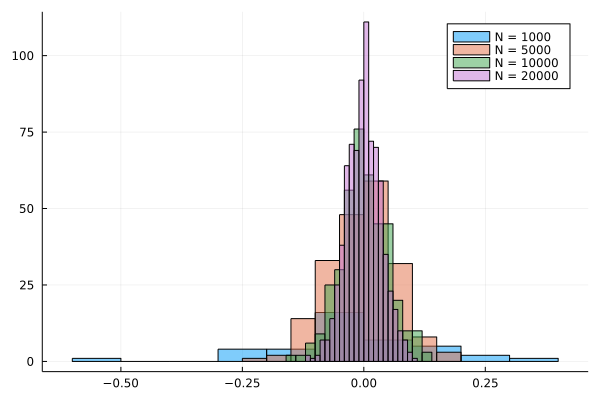

In [3]:
histogram([N1k', N5k', N10k', N20k'], fillalpha = 0.5, label = ["N = 1000" "N = 5000" "N = 10000" "N = 20000"])

In [99]:
Random.seed!(12)
N = 500
M = 50
ξ = SH.generate_patterns(M, N)
σ1 = ξ[:,1]
σ2 = ξ[:,2]
σ3 = ξ[:,3]
J = SH.store(ξ)

ξ12 = generate_intermediate_patterns(σ1, σ2)#, J)
ξ23 = generate_intermediate_patterns(σ2, σ3)

s12 = size(ξ12, 2)
s23 = size(ξ23, 2)

energies = zeros(s12 + s23 + 1)
energies[1] = SH.energy(J, σ1)
#energies[s12 + 1] = SH.energy(J, σ2)
#energies[end] = SH.energy(J, σ3)

for i in 1:s12
    energies[i + 1] = SH.energy(J, ξ12[:, i])
end

for i in 1:s23
 #   println(i)
    energies[s12 + 1 + i] = SH.energy(J, ξ23[:, i])
end

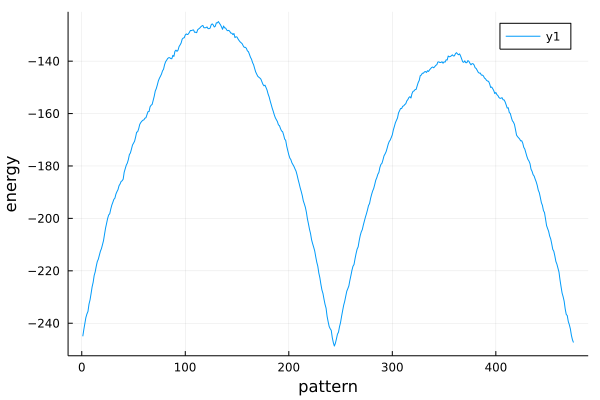

In [100]:
plot(energies, xlabel = "pattern", ylabel = "energy")